In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import json
import random

X = []
Y = []

with open('output.jl', 'rb') as f:
    for l in f:
        item = json.loads(l)
        currentArray = []
        currentArray.append(item['floor'])
        currentArray.append(item['number_of_floors'])
        currentArray.append(item['number_of_rooms'])
        currentArray.append(item['area']['total'])
        currentArray.append(item['location']['latitude'])
        currentArray.append(item['location']['longitude'])
        currentArray.append(item['apt_state'])
        
        X.append(currentArray)
        
        Y.append(float(item['price']['amount']))
        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Mean absolute error 23140.408313525837
Mean square error 2653783304.4586806


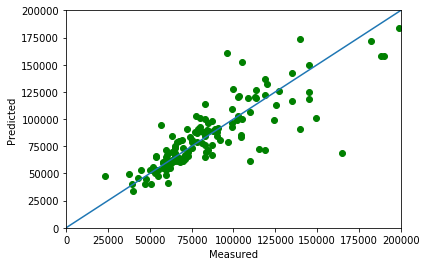

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

from catboost import CatBoostRegressor, cv, Pool

model_001_cv = CatBoostRegressor(learning_rate=0.1, iterations=3000, depth=10, loss_function='RMSE',
                                 logging_level='Silent')

#model_001_cv.fit(X_train, Y_train)
model_001_cv.fit(X_train, Y_train, eval_set=[X_test, Y_test])

model_001_cv.save_model("fitted_model")


ytest_pred = model_001_cv.predict(X_test)

print("Mean absolute error", mean_absolute_error(Y_test, ytest_pred))
print("Mean square error", mean_squared_error(Y_test, ytest_pred))

plt.scatter(Y_test, ytest_pred, c="g", marker="o")
plt.xlabel('Measured')
plt.ylabel('Predicted')

axes = plt.gca()
axes.set_xlim([0,200000])
axes.set_ylim([0,200000])

x = np.arange(0, 400000, 1000)
plt.plot(x, x)
plt.show()

In [132]:

# https://realt.by/sale/flats/object/1198196/
print(model_001_cv.predict([[24, 25, 1, 45.2, 53.878398, 27.569153, 1]]))



[66222.38553695]


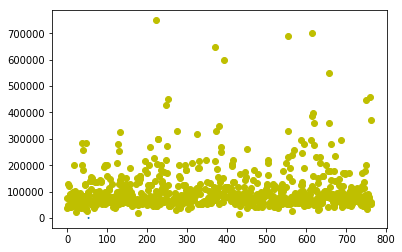

In [153]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()

plt.plot([a[4] for a in X], [a[5] for a in X], Y, 'yo')


In [151]:
import os
import math

import numpy as np

import gmaps
import gmaps.datasets
gmaps.configure(api_key=os.environ['GOOGLE_MAPS_KEY'])

locations = []
weights = []
for lat in np.arange(53.80, 54.0, 0.001):
    for long in np.arange(27.35, 27.75, 0.001):
        locations.append((lat, long))
        weights.append(model_001_cv.predict([[3, 9, 1, 45, lat, long, 3]])[0])

mean = sum(weights) / len(weights)

diffs = [(x - mean)**2 for x in weights]

dev = math.sqrt(sum(diffs) / len(diffs))

weights = [(x - mean) / dev for x in weights]

min_weight = min(weights)
weights = [(x - min_weight) / 100.0 for x in weights]

#weights

fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))